In [1]:
# 1. Form the 2-D array (without typing it in explicitly)

In [2]:
import numpy as np

In [22]:
a=np.arange(15).reshape(5,3)+1
a


array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15]])

In [38]:
a = np.arange(25).reshape(5, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [40]:
b = np.array([1., 5, 10, 15, 20])
c=a/b[:,np.newaxis]
c

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 1.        ,  1.2       ,  1.4       ,  1.6       ,  1.8       ],
       [ 1.        ,  1.1       ,  1.2       ,  1.3       ,  1.4       ],
       [ 1.        ,  1.06666667,  1.13333333,  1.2       ,  1.26666667],
       [ 1.        ,  1.05      ,  1.1       ,  1.15      ,  1.2       ]])

In [31]:
a=np.random.rand(30).reshape(10,3)
a

array([[ 0.0072527 ,  0.15894364,  0.25339276],
       [ 0.0443708 ,  0.718241  ,  0.42405431],
       [ 0.47980715,  0.83797305,  0.47136081],
       [ 0.27953583,  0.24179125,  0.18982188],
       [ 0.41774194,  0.71178135,  0.40250849],
       [ 0.66600032,  0.42220118,  0.58090004],
       [ 0.47786776,  0.96518501,  0.62515587],
       [ 0.61525426,  0.31992977,  0.85851635],
       [ 0.46269801,  0.23552187,  0.63587387],
       [ 0.14703059,  0.62986592,  0.17233872]])

In [41]:
# Picture manipulation: Framing a Face

In [46]:
from scipy import misc
%matplotlib inline
face = misc.face(gray=True)  # 2D grayscale image

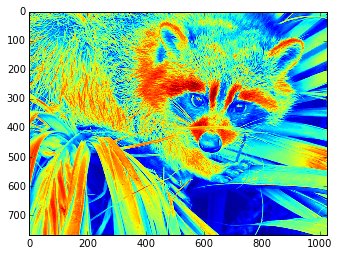

In [49]:
import pylab as plt
face = misc.face(gray=True)
plt.imshow(face)

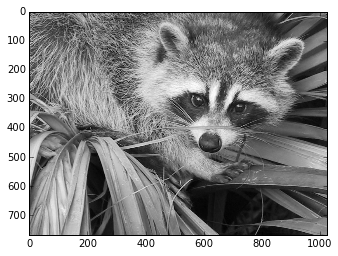

In [50]:
plt.imshow(face, cmap=plt.cm.gray)

In [51]:
crop_face = face[100:-100, 100:-100]

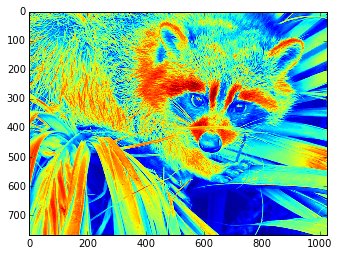

In [55]:
crop_face = misc.face(gray=True)
plt.imshow(crop_face)

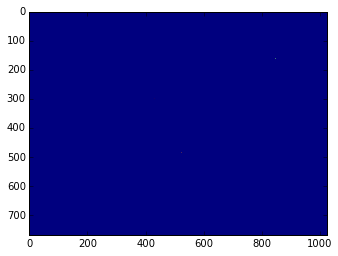

In [59]:
sy, sx = face.shape
y, x = np.ogrid[0:sy, 0:sx] # x and y indices of pixels
centerx, centery = (660, 300) # center of the image
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2 # circle
face[mask] = 0
plt.imshow(face)

In [60]:
# Data statistics

array([[ 30000.,   4000.,  48300.],
       [ 47200.,   6100.,  48200.],
       [ 70200.,   9800.,  41500.],
       [ 77400.,  35200.,  38200.],
       [ 36300.,  59400.,  40600.],
       [ 20600.,  41700.,  39800.],
       [ 18100.,  19000.,  38600.],
       [ 21400.,  13000.,  42300.],
       [ 22000.,   8300.,  44500.],
       [ 25400.,   9100.,  42100.],
       [ 27100.,   7400.,  46000.],
       [ 40300.,   8000.,  46800.],
       [ 57000.,  12300.,  43800.],
       [ 76600.,  19500.,  40900.],
       [ 52300.,  45700.,  39400.],
       [ 19500.,  51100.,  39000.],
       [ 11200.,  29700.,  36700.],
       [  7600.,  15800.,  41800.],
       [ 14600.,   9700.,  43300.],
       [ 16200.,  10100.,  41300.],
       [ 24700.,   8600.,  47300.]])

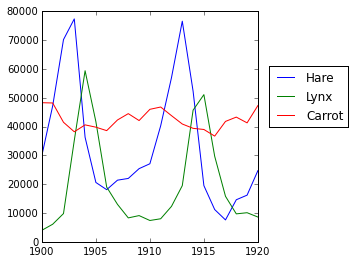

In [145]:
data = np.loadtxt('C:/Users/ma_1/Desktop/populations.txt')
year, hares, lynxes, carrots = data.T  # trick: columns to variables
import matplotlib.pyplot as plt
plt.axes([0.2, 0.1, 0.5, 0.8])
plt.plot(year, hares, year, lynxes, year, carrots)
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))
data
populations = data[:,1:]
populations

In [131]:
# The mean and std of the populations of each species for the years in the period

print "Mean:", data.mean(axis=0)
print "Std:", data.std(axis=0)

Mean: [  1910.          34080.95238095  20166.66666667  42400.        ]
Std: [  6.05530071e+00   2.08979065e+04   1.62545915e+04   3.32250623e+03]


In [135]:
# Which year each species had the largest population
data.T[0][data.T[2].argmax()]
data.T[0][data.T[1].argmax()]
data.T[0][data.T[3].argmax()]
j_max_years = np.argmax(data, axis=0)
print "Max. year:", year[j_max_years]

Max. year: [ 1920.  1903.  1904.  1900.]


In [144]:
# Which species has the largest population for each year
j = np.array(np.argsort(data.T[1:4]))
j.max(axis=0)
data.T[0][j.min(axis=0)]
max_species = np.argmax(populations, axis=1)
species = np.array(['Hare', 'Lynx', 'Carrot'])
print "Max species:"
print year
print species[max_species]


Max species:
[ 1900.  1901.  1902.  1903.  1904.  1905.  1906.  1907.  1908.  1909.
  1910.  1911.  1912.  1913.  1914.  1915.  1916.  1917.  1918.  1919.
  1920.]
['Carrot' 'Carrot' 'Hare' 'Hare' 'Lynx' 'Lynx' 'Carrot' 'Carrot' 'Carrot'
 'Carrot' 'Carrot' 'Carrot' 'Hare' 'Hare' 'Hare' 'Lynx' 'Carrot' 'Carrot'
 'Carrot' 'Carrot' 'Carrot']


In [146]:
# Which years any of the populations is above 50000.
above_50000 = np.any(populations > 50000, axis=1)
print "Any above 50000:", year[above_50000]

Any above 50000: [ 1902.  1903.  1904.  1912.  1913.  1914.  1915.]


In [147]:
# The top 2 years for each species when they had the lowest populations.
j_top_2 = np.argsort(populations, axis=0)[:2]
print "Top 2 years with lowest populations for each:"
print year[j_top_2]

Top 2 years with lowest populations for each:
[[ 1917.  1900.  1916.]
 [ 1916.  1901.  1903.]]


diff(Hares) vs. Lynxes correlation -0.917924848032


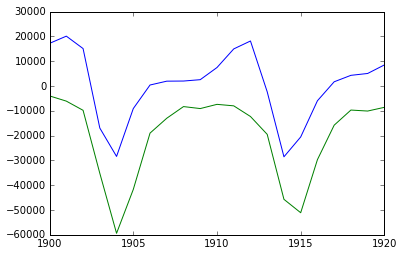

In [148]:
# Compare (plot) the change in hare population (see help(np.gradient)) and the number of lynxes. Check correlation
hare_grad = np.gradient(hares, 1.0)
print "diff(Hares) vs. Lynxes correlation", np.corrcoef(hare_grad, lynxes)[0,1]
import matplotlib.pyplot as plt
plt.plot(year, hare_grad, year, -lynxes)
plt.savefig('plot.png')

In [149]:
# Crude integral approximations
import numpy as np
from numpy import newaxis

def f(a, b, c):
    return a**b - c

a = np.linspace(0, 1, 24)
b = np.linspace(0, 1, 12)
c = np.linspace(0, 1, 6)

samples = f(a[:,newaxis,newaxis],
            b[newaxis,:,newaxis],
            c[newaxis,newaxis,:])

# or,
#
# a, b, c = np.ogrid[0:1:24j, 0:1:12j, 0:1:6j]
# samples = f(a, b, c)

integral = samples.mean()

print "Approximation:", integral
print "Exact:", np.log(2) - 0.5


Approximation: 0.18884234603
Exact: 0.19314718056


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: overflow encountered in square
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in square
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: invalid value encountered in less


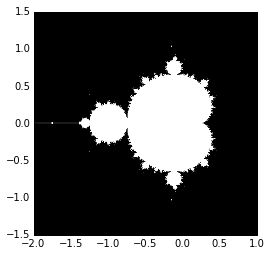

In [150]:
# Mandelbrot set
"""
Compute the Mandelbrot fractal
"""
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis

def compute_mandelbrot(N_max, some_threshold, nx, ny):
    # A grid of c-values
    x = np.linspace(-2, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)

    c = x[:,newaxis] + 1j*y[newaxis,:]

    # Mandelbrot iteration

    z = c
    for j in xrange(N_max):
        z = z**2 + c

    mandelbrot_set = (abs(z) < some_threshold)

    return mandelbrot_set

# Save

mandelbrot_set = compute_mandelbrot(50, 50., 601, 401)

plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
plt.gray()
plt.savefig('mandelbrot.png')


In [151]:
# Markov chain
import numpy as np

np.random.seed(1234)

n_states = 5
n_steps = 50
tolerance = 1e-5

# Random transition matrix and state vector
P = np.random.rand(n_states, n_states)
p = np.random.rand(n_states)

# Normalize rows in P
P /= P.sum(axis=1)[:,np.newaxis]

# Normalize p
p /= p.sum()

# Take steps
for k in xrange(n_steps):
    p = P.T.dot(p)

p_50 = p
print p_50

# Compute stationary state
w, v = np.linalg.eig(P.T)

j_stationary = np.argmin(abs(w - 1.0))
p_stationary = v[:,j_stationary].real
p_stationary /= p_stationary.sum()
print p_stationary

# Compare
if all(abs(p_50 - p_stationary) < tolerance):
    print "Tolerance satisfied in infty-norm"

if np.linalg.norm(p_50 - p_stationary) < tolerance:
    print "Tolerance satisfied in 2-norm"


[ 0.13953703  0.19482107  0.11068456  0.24536522  0.30959211]
[ 0.13953703  0.19482107  0.11068456  0.24536522  0.30959211]
Tolerance satisfied in infty-norm
Tolerance satisfied in 2-norm
